# Installing Libraries, if needed

In [ ]:
!pip install tensorflow

# Loding Required Librararies

In [324]:
import numpy as np

import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist

from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense

from tensorflow.keras.optimizers import SGD, Adam, Adagrad

from tensorflow.keras.layers import Dropout

# A. Loading and Processing Data

### Loading data from minst

In [325]:
data = mnist.load_data()

In [326]:
(X_train,Y_train), (X_test,Y_test) = data

### Understanding the size and number of images

In [327]:
X_train.shape

(60000, 28, 28)

In [328]:
Y_train.shape

(60000,)

In [329]:
X_test.shape

(10000, 28, 28)

In [330]:
Y_test.shape

(10000,)

It is evident that we have 60,000 images in training data and 10,000 images in test data.<br>
Each image is of size 28x28x1

### Viewing the images once

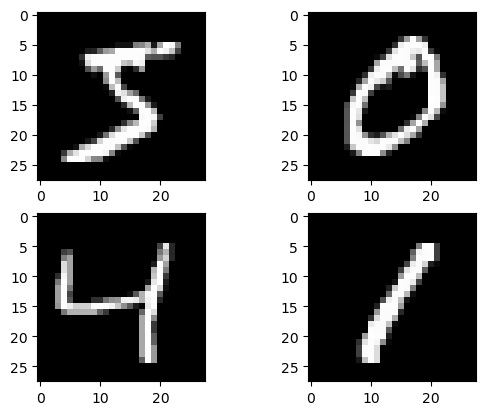

In [331]:
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))

plt.show()

### Flattening the images

In [332]:
num_pixels = X_train.shape[1] * X_train.shape[2]

In [333]:
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)

In [334]:
X_train.shape

(60000, 784)

In [335]:
X_test.shape

(10000, 784)

In [336]:
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

In [337]:
Y_train.shape

(60000, 10)

In [338]:
Y_test.shape

(10000, 10)

In [339]:
num_classes = Y_train.shape[1]

### Separate validation Data

In [345]:
from sklearn.model_selection import train_test_split

In [346]:
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size = 0.2)

# B. Training a simple model

### A single layer neural network

In [347]:
model = Sequential()
model.add(Dense(num_classes, input_dim = num_pixels, activation = 'softmax'))

In [348]:
model.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [349]:
model.fit(X_train, Y_train, validation_data = (X_valid,Y_valid) , epochs = 10, batch_size = 200)

Epoch 1/10
192/192 [==============================] - 1s 2ms/step - loss: 295.8473 - accuracy: 0.7983 - val_loss: 103.2642 - val_accuracy: 0.8748
Epoch 2/10
192/192 [==============================] - 0s 1ms/step - loss: 135.0051 - accuracy: 0.8588 - val_loss: 110.5620 - val_accuracy: 0.8567
Epoch 3/10
192/192 [==============================] - 0s 1ms/step - loss: 126.5370 - accuracy: 0.8639 - val_loss: 96.6404 - val_accuracy: 0.8643
Epoch 4/10
192/192 [==============================] - 0s 1ms/step - loss: 128.1540 - accuracy: 0.8665 - val_loss: 82.2827 - val_accuracy: 0.8871
Epoch 5/10
192/192 [==============================] - 0s 1ms/step - loss: 127.1731 - accuracy: 0.8680 - val_loss: 205.6910 - val_accuracy: 0.8339
Epoch 6/10
192/192 [==============================] - 0s 1ms/step - loss: 105.9755 - accuracy: 0.8783 - val_loss: 80.7577 - val_accuracy: 0.8969
Epoch 7/10
192/192 [==============================] - 0s 1ms/step - loss: 112.9261 - accuracy: 0.8733 - val_loss: 109.0554 - va

In [350]:
score = model.evaluate(X_test,Y_test)
print(f"%age accuracy = {score[1]*100}")

313/313 [==============================] - 0s 760us/step - loss: 73.4387 - accuracy: 0.9088
%age accuracy = 90.88000059127808


### Neural Network with 3  hidden layers

In [351]:
model = Sequential()
model.add(Dense(500, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(num_classes, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'sgd', metrics = 'accuracy')
model.fit(X_train, Y_train, validation_data = (X_valid,Y_valid), epochs = 10, batch_size = 200)

Epoch 1/10
192/192 [==============================] - 1s 5ms/step - loss: nan - accuracy: 0.0979 - val_loss: nan - val_accuracy: 0.1011
Epoch 2/10
192/192 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.0972 - val_loss: nan - val_accuracy: 0.1011
Epoch 3/10
192/192 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.0972 - val_loss: nan - val_accuracy: 0.1011
Epoch 4/10
192/192 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.0972 - val_loss: nan - val_accuracy: 0.1011
Epoch 5/10
192/192 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.0972 - val_loss: nan - val_accuracy: 0.1011
Epoch 6/10
192/192 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.0972 - val_loss: nan - val_accuracy: 0.1011
Epoch 7/10
192/192 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.0972 - val_loss: nan - val_accuracy: 0.1011
Epoch 8/10
192/192 [============================

In [352]:
score = model.evaluate(X_test,Y_test)
print(f"%age accuracy = {score[1]*100}")

313/313 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0980
%age accuracy = 9.799999743700027


#### Getting very poor accuracy, trying to find reasons

# C. Improving the trained model by varying Optimizers and Acivation Functions

### Changing Activation Function of Last Hidden Layer to sigmoid

In [353]:
model = Sequential()
model.add(Dense(500, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(50, activation = 'sigmoid'))
model.add(Dense(num_classes, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'sgd', metrics = 'accuracy')
model.fit(X_train, Y_train, validation_data = (X_valid,Y_valid), epochs = 10, batch_size = 200)

Epoch 1/10
192/192 [==============================] - 1s 5ms/step - loss: 1.3671 - accuracy: 0.6615 - val_loss: 0.9466 - val_accuracy: 0.8245
Epoch 2/10
192/192 [==============================] - 1s 4ms/step - loss: 0.7725 - accuracy: 0.8565 - val_loss: 0.6461 - val_accuracy: 0.8742
Epoch 3/10
192/192 [==============================] - 1s 4ms/step - loss: 0.5591 - accuracy: 0.8931 - val_loss: 0.5042 - val_accuracy: 0.9005
Epoch 4/10
192/192 [==============================] - 1s 4ms/step - loss: 0.4484 - accuracy: 0.9093 - val_loss: 0.4204 - val_accuracy: 0.9129
Epoch 5/10
192/192 [==============================] - 1s 4ms/step - loss: 0.3777 - accuracy: 0.9201 - val_loss: 0.3726 - val_accuracy: 0.9191
Epoch 6/10
192/192 [==============================] - 1s 4ms/step - loss: 0.3266 - accuracy: 0.9289 - val_loss: 0.3301 - val_accuracy: 0.9211
Epoch 7/10
192/192 [==============================] - 1s 4ms/step - loss: 0.2903 - accuracy: 0.9357 - val_loss: 0.2982 - val_accuracy: 0.9280
Epoch 

In [354]:
score = model.evaluate(X_test,Y_test)
print(f"%age accuracy = {score[1]*100}")

313/313 [==============================] - 0s 1ms/step - loss: 0.2377 - accuracy: 0.9404
%age accuracy = 94.04000043869019


### Using sgd with momentum and different Learning Rate

In [356]:
sgd = SGD(momentum = 0.35, learning_rate = 0.05)

In [357]:
model = Sequential()
model.add(Dense(500, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(50, activation = 'sigmoid'))
model.add(Dense(num_classes, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = sgd, metrics = 'accuracy')
model.fit(X_train, Y_train, validation_data = (X_valid,Y_valid), epochs = 10, batch_size = 200)

Epoch 1/10
192/192 [==============================] - 1s 5ms/step - loss: 0.8067 - accuracy: 0.7981 - val_loss: 0.4202 - val_accuracy: 0.8988
Epoch 2/10
192/192 [==============================] - 1s 5ms/step - loss: 0.3203 - accuracy: 0.9199 - val_loss: 0.2645 - val_accuracy: 0.9297
Epoch 3/10
192/192 [==============================] - 1s 5ms/step - loss: 0.2263 - accuracy: 0.9409 - val_loss: 0.2078 - val_accuracy: 0.9427
Epoch 4/10
192/192 [==============================] - 1s 5ms/step - loss: 0.1788 - accuracy: 0.9534 - val_loss: 0.1905 - val_accuracy: 0.9452
Epoch 5/10
192/192 [==============================] - 1s 5ms/step - loss: 0.1509 - accuracy: 0.9591 - val_loss: 0.1571 - val_accuracy: 0.9558
Epoch 6/10
192/192 [==============================] - 1s 5ms/step - loss: 0.1291 - accuracy: 0.9646 - val_loss: 0.1636 - val_accuracy: 0.9522
Epoch 7/10
192/192 [==============================] - 1s 5ms/step - loss: 0.1117 - accuracy: 0.9705 - val_loss: 0.1491 - val_accuracy: 0.9581
Epoch 

In [358]:
score = model.evaluate(X_test,Y_test)
print(f"%age accuracy with SGD = {score[1]*100:.2f}%")

313/313 [==============================] - 0s 1ms/step - loss: 0.1140 - accuracy: 0.9672
%age accuracy with SGD = 96.72%


### Using Adam and AdaGrad

In [364]:
adam = Adam(learning_rate = 0.001)

In [365]:
model = Sequential()
model.add(Dense(500, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(50, activation = 'sigmoid'))
model.add(Dense(num_classes, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = 'accuracy')
model.fit(X_train, Y_train, validation_data = (X_valid,Y_valid), epochs = 10, batch_size = 200)

Epoch 1/10
192/192 [==============================] - 2s 7ms/step - loss: 1.0983 - accuracy: 0.7437 - val_loss: 0.5701 - val_accuracy: 0.8889
Epoch 2/10
192/192 [==============================] - 1s 6ms/step - loss: 0.4163 - accuracy: 0.9099 - val_loss: 0.3138 - val_accuracy: 0.9278
Epoch 3/10
192/192 [==============================] - 1s 6ms/step - loss: 0.2746 - accuracy: 0.9315 - val_loss: 0.2472 - val_accuracy: 0.9360
Epoch 4/10
192/192 [==============================] - 1s 6ms/step - loss: 0.2162 - accuracy: 0.9424 - val_loss: 0.2120 - val_accuracy: 0.9425
Epoch 5/10
192/192 [==============================] - 1s 6ms/step - loss: 0.1952 - accuracy: 0.9473 - val_loss: 0.1830 - val_accuracy: 0.9494
Epoch 6/10
192/192 [==============================] - 1s 6ms/step - loss: 0.1674 - accuracy: 0.9543 - val_loss: 0.1789 - val_accuracy: 0.9516
Epoch 7/10
192/192 [==============================] - 1s 6ms/step - loss: 0.1577 - accuracy: 0.9556 - val_loss: 0.1778 - val_accuracy: 0.9483
Epoch 

In [366]:
score = model.evaluate(X_test,Y_test)
print(f"%age accuracy with Adam = {score[1]*100:.2f}%")

313/313 [==============================] - 0s 1ms/step - loss: 0.1441 - accuracy: 0.9599
%age accuracy with Adam = 95.99%


In [367]:
adagrad = Adagrad(learning_rate = 0.01)

In [368]:
model = Sequential()
model.add(Dense(500, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(50, activation = 'sigmoid'))
model.add(Dense(num_classes, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = adagrad, metrics = 'accuracy')
model.fit(X_train, Y_train, validation_data = (X_valid,Y_valid), epochs = 10, batch_size = 200)

Epoch 1/10
192/192 [==============================] - 2s 6ms/step - loss: 0.9164 - accuracy: 0.7836 - val_loss: 0.5328 - val_accuracy: 0.8848
Epoch 2/10
192/192 [==============================] - 1s 6ms/step - loss: 0.4198 - accuracy: 0.9097 - val_loss: 0.3604 - val_accuracy: 0.9186
Epoch 3/10
192/192 [==============================] - 1s 6ms/step - loss: 0.3067 - accuracy: 0.9300 - val_loss: 0.2917 - val_accuracy: 0.9301
Epoch 4/10
192/192 [==============================] - 1s 6ms/step - loss: 0.2507 - accuracy: 0.9402 - val_loss: 0.2438 - val_accuracy: 0.9388
Epoch 5/10
192/192 [==============================] - 1s 6ms/step - loss: 0.2093 - accuracy: 0.9502 - val_loss: 0.2173 - val_accuracy: 0.9455
Epoch 6/10
192/192 [==============================] - 1s 6ms/step - loss: 0.1826 - accuracy: 0.9558 - val_loss: 0.2006 - val_accuracy: 0.9474
Epoch 7/10
192/192 [==============================] - 1s 6ms/step - loss: 0.1594 - accuracy: 0.9618 - val_loss: 0.1856 - val_accuracy: 0.9524
Epoch 

In [369]:
score = model.evaluate(X_test,Y_test)
print(f"%age accuracy with Adagrad = {score[1]*100:.2f}%")

313/313 [==============================] - 0s 1ms/step - loss: 0.1505 - accuracy: 0.9589
%age accuracy with Adagrad = 95.89%


#### There was problem of exploding gradients, which was fixed by using sigmoid activation in last hidden layer <br> After further improving optimizers, an accuracy of around 96% was obtained.

# D. Adding Dropout regulations, trying to improve the model even further

In [398]:
sgd = SGD(momentum = 0.35, learning_rate = 0.05)

In [399]:
model = Sequential()
model.add(Dense(500, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(100, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(50, activation = 'sigmoid'))
model.add(Dense(num_classes, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = sgd, metrics = 'accuracy')
model.fit(X_train, Y_train, validation_data = (X_valid,Y_valid), epochs = 10, batch_size = 200)

Epoch 1/10
192/192 [==============================] - 1s 6ms/step - loss: 1.2077 - accuracy: 0.6315 - val_loss: 0.5153 - val_accuracy: 0.8686
Epoch 2/10
192/192 [==============================] - 1s 6ms/step - loss: 0.4998 - accuracy: 0.8634 - val_loss: 0.3103 - val_accuracy: 0.9151
Epoch 3/10
192/192 [==============================] - 1s 6ms/step - loss: 0.3677 - accuracy: 0.8986 - val_loss: 0.2532 - val_accuracy: 0.9309
Epoch 4/10
192/192 [==============================] - 1s 6ms/step - loss: 0.3149 - accuracy: 0.9112 - val_loss: 0.2406 - val_accuracy: 0.9334
Epoch 5/10
192/192 [==============================] - 1s 6ms/step - loss: 0.2756 - accuracy: 0.9226 - val_loss: 0.2058 - val_accuracy: 0.9430
Epoch 6/10
192/192 [==============================] - 1s 6ms/step - loss: 0.2456 - accuracy: 0.9313 - val_loss: 0.1843 - val_accuracy: 0.9473
Epoch 7/10
192/192 [==============================] - 1s 5ms/step - loss: 0.2219 - accuracy: 0.9371 - val_loss: 0.1853 - val_accuracy: 0.9456
Epoch 

In [400]:
score = model.evaluate(X_test,Y_test)
print(f"%age accuracy with Adagrad = {score[1]*100:.2f}%")

313/313 [==============================] - 0s 1ms/step - loss: 0.1496 - accuracy: 0.9589
%age accuracy with Adagrad = 95.89%


#### Since there was no case of overfitting, the model accuracy remains the same even after adding dropout layers.

# E. Analysing Model Summary and saving the final model

In [410]:
model.summary()

Model: "sequential_103"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_377 (Dense)           (None, 500)               392500    
                                                                 
 dropout_34 (Dropout)        (None, 500)               0         
                                                                 
 dense_378 (Dense)           (None, 100)               50100     
                                                                 
 dropout_35 (Dropout)        (None, 100)               0         
                                                                 
 dense_379 (Dense)           (None, 50)                5050      
                                                                 
 dense_380 (Dense)           (None, 10)                510       
                                                                 
Total params: 448160 (1.71 MB)
Trainable params: 448

### Saving the model

In [411]:
import h5py
model.save_weights("MNIST_Model_Weights.h5")

In [412]:
model_json = model.to_json()
with open("MNIST_Model_structure.json", "w") as json_file:
    json_file.write(model_json)

### Trying to load the saved model

In [413]:
from tensorflow.keras.models import model_from_json

json_file = open("MNIST_Model_structure.json", 'r')
loaded_model = model_from_json(json_file.read())
json_file.close()

loaded_model.load_weights("MNIST_Model_Weights.h5")

In [414]:
loaded_model.summary()

Model: "sequential_103"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_377 (Dense)           (None, 500)               392500    
                                                                 
 dropout_34 (Dropout)        (None, 500)               0         
                                                                 
 dense_378 (Dense)           (None, 100)               50100     
                                                                 
 dropout_35 (Dropout)        (None, 100)               0         
                                                                 
 dense_379 (Dense)           (None, 50)                5050      
                                                                 
 dense_380 (Dense)           (None, 10)                510       
                                                                 
Total params: 448160 (1.71 MB)
Trainable params: 448

In [415]:
sgd = SGD(momentum = 0.35, learning_rate = 0.05)
loaded_model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
score = loaded_model.evaluate(X_test,Y_test)
print(f"%age accuracy of Loaded Model = {score[1]*100:.2f}%")

313/313 [==============================] - 1s 1ms/step - loss: 0.1496 - accuracy: 0.9589
%age accuracy of Loaded Model = 95.89%
